In [75]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Major project/unsw_nb_15.csv')

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,1.415894e+04,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473370,8.395112e+03,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [ ]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,14158.9420,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473370,8395.1120,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.2719,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.1790,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.4990,...,0,0,2,1,0,0,0,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [ ]:
#attack labels
labels=data.iloc[:,-2]
print(labels)

0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
175336      Generic
175337    Shellcode
175338      Generic
175339      Generic
175340      Generic
Name: attack_cat, Length: 175341, dtype: object


In [ ]:
data.shape

(175341, 36)

In [ ]:
data.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [ ]:
data[data['service']=='-']

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,14158.9420,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473370,8395.1120,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.2719,...,0,0,1,1,0,0,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.4990,...,0,0,2,1,0,0,0,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,10112.0250,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,0.653375,tcp,-,FIN,10,8,564,354,26.018747,6220.0110,...,0,0,1,1,0,0,0,0,Reconnaissance,1
175179,0.695566,tcp,-,FIN,10,8,564,354,24.440529,5842.7236,...,0,0,1,1,0,0,0,0,Reconnaissance,1
175191,0.962856,tcp,-,FIN,24,60,1256,59374,86.201880,10003.5730,...,0,0,1,1,0,0,0,0,Exploits,1
175277,3.719110,tcp,-,FIN,66,340,3086,426483,108.897020,6539.1987,...,0,0,1,1,0,0,0,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,1.415894e+04,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473370,8.395112e+03,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,NaN,FIN,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,NaN,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [ ]:
data.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [ ]:
data.shape

(175341, 36)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(175341, 36)

In [ ]:
data['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [ ]:
data['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,1.415894e+04,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473370,8.395112e+03,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [ ]:
features=pd.read_csv('/content/drive/MyDrive/Major project/features.csv')
features.head()

,SNo .,Name,Type,Description
0,1,srcip,Integer,Source IP address
1,2,sport,Float,Source port number
2,3,dstip,Integer,Destination IP address
3,4,dsport,Float,Destination port number
4,5,proto,Nominal,Transaction protocol


In [ ]:
#selecting column names of all data types
nominal_names=features['Name'][features['Type']=='nominal']
integer_names=features['Name'][features['Type']=='integer']
float_names=features['Name'][features['Type']=='float']
binary_names=features['Name'][features['Type']=='binary']

In [ ]:
cols=data.columns
nominal_names=cols.intersection(nominal_names)
integer_names=cols.intersection(integer_names)
float_names=cols.intersection(float_names)
binary_names=cols.intersection(binary_names)

In [ ]:
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,1.415894e+04,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473370,8.395112e+03,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.110000,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


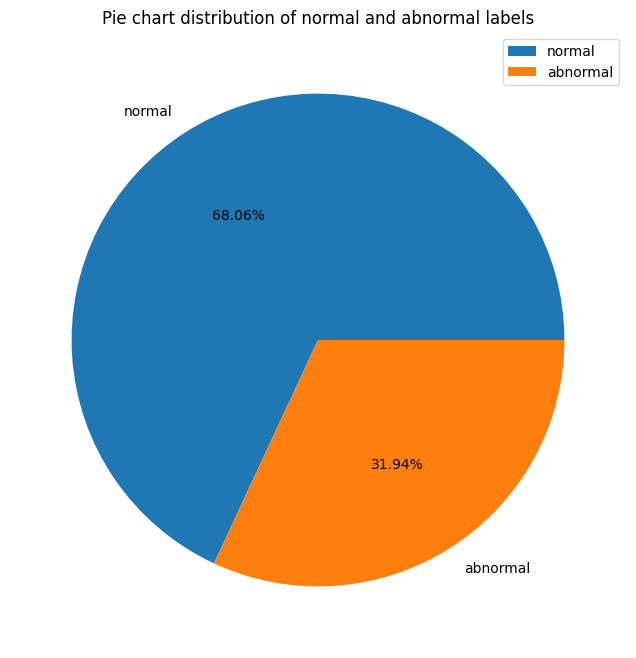

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

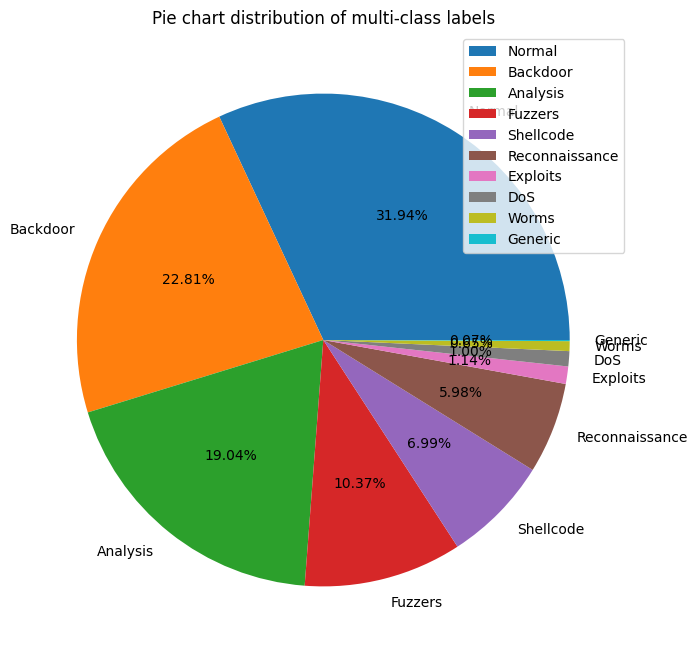

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of multi-class labels")
plt.legend()
plt.show()

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
data.shape

(175341, 36)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(175341, 191)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.shape

(175341, 188)

In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,14158.9420,8495.3650,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0.649902,14,38,734,42014,78.473370,8395.1120,503571.3000,2,17,...,False,False,False,True,False,False,False,False,False,False
2,1.623129,8,16,364,13186,14.170161,1572.2719,60929.2300,1,6,...,False,False,False,True,False,False,False,False,False,False
3,1.681642,12,12,628,770,13.677108,2740.1790,3358.6220,1,3,...,False,False,False,True,False,False,False,False,False,False
4,0.449454,10,6,534,268,33.373825,8561.4990,3987.0598,2,1,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,2.364553e-06,0.000379,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,False
1,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,1.401989e-06,0.022458,0.000416,0.003100,...,False,False,False,True,False,False,False,False,False,False
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,2.625704e-07,0.002717,0.000208,0.001094,...,False,False,False,True,False,False,False,False,False,False
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,4.576117e-07,0.000150,0.000208,0.000547,...,False,False,False,True,False,False,False,False,False,False
4,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,1.429776e-06,0.000178,0.000416,0.000182,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
num_col.append('label')

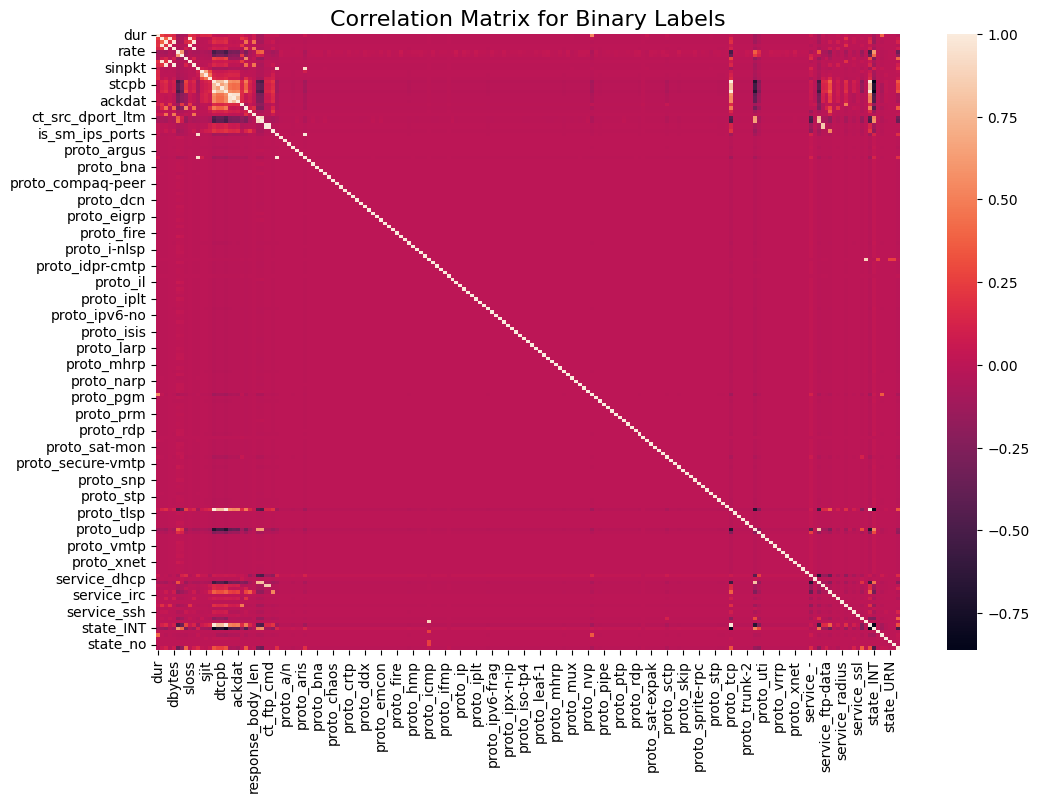

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(12,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

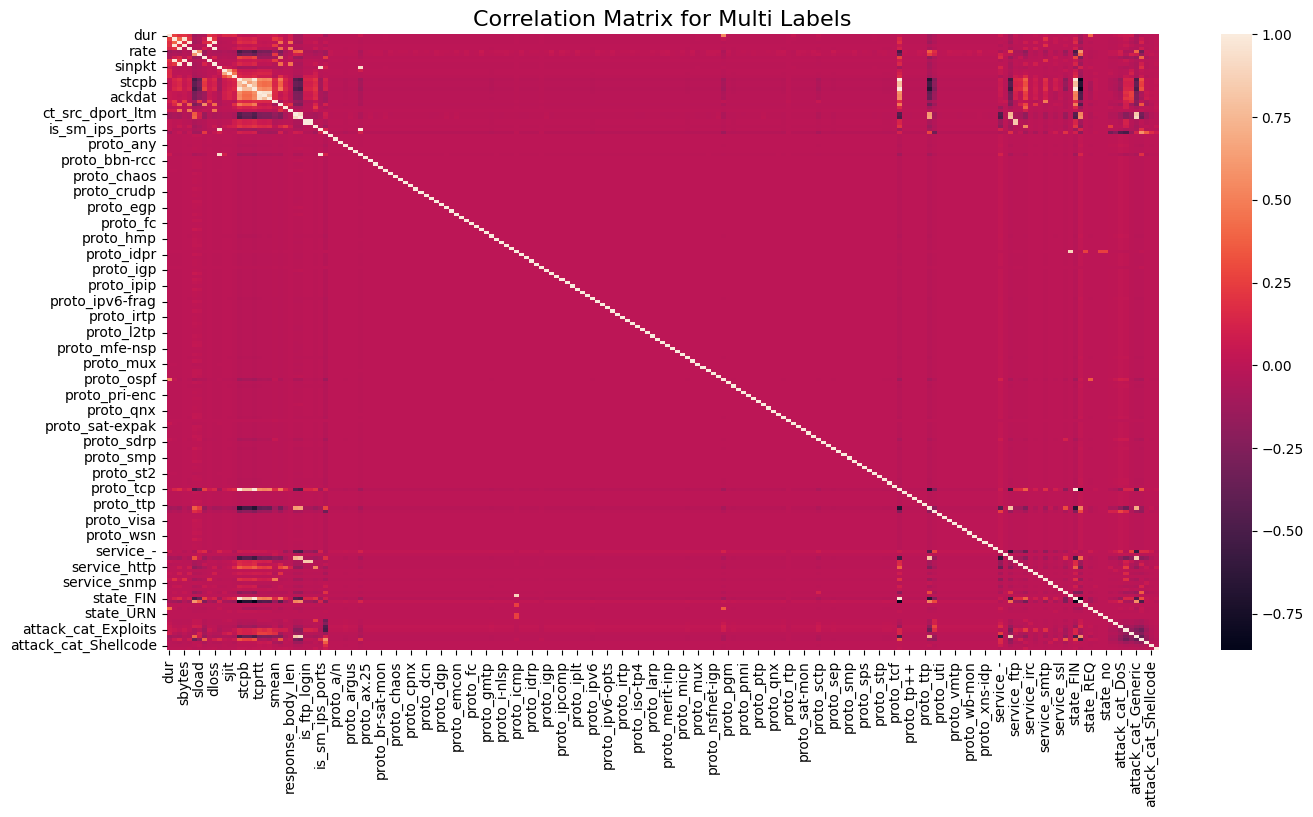

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(16,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

state_FIN           0.303311
ct_src_dport_ltm    0.305579
dwin                0.319626
swin                0.333633
proto_tcp           0.333726
rate                0.337979
dmean               0.341806
ct_dst_sport_ltm    0.357213
state_CON           0.366805
dload               0.393739
state_INT           0.503995
label               1.000000
Name: label, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'dload', 'swin', 'dwin', 'dmean', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'proto_tcp', 'state_CON', 'state_FIN', 'state_INT',
       'label'],
      dtype='object')

In [ ]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,dload,swin,dwin,dmean,ct_src_dport_ltm,ct_dst_sport_ltm,proto_tcp,state_CON,state_FIN,state_INT,label
0,0.000074,0.000379,1.0,1.0,0.029492,0.00,0.000000,1.0,0.0,1.0,0.0,1
1,0.000078,0.022458,1.0,1.0,0.758573,0.00,0.000000,1.0,0.0,1.0,0.0,1
2,0.000014,0.002717,1.0,1.0,0.565158,0.00,0.000000,1.0,0.0,1.0,0.0,1
3,0.000014,0.000150,1.0,1.0,0.043896,0.00,0.000000,1.0,0.0,1.0,0.0,1
4,0.000033,0.000178,1.0,1.0,0.030864,0.02,0.000000,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.111111,0.000000,0.0,0.0,0.000000,0.46,0.266667,0.0,0.0,0.0,1.0,0
175337,0.000034,0.000219,1.0,1.0,0.030178,0.00,0.000000,1.0,0.0,1.0,0.0,0
175338,0.111111,0.000000,0.0,0.0,0.000000,0.04,0.044444,0.0,0.0,0.0,1.0,0
175339,0.111111,0.000000,0.0,0.0,0.000000,0.58,0.288889,0.0,0.0,0.0,1.0,0


In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

attack_cat_Analysis          0.319875
proto_unas                   0.342739
attack_cat_Reconnaissance    0.374792
attack_cat_DoS               0.466914
attack_cat_Exploits          0.516529
attack_cat_Normal            0.580908
label                        1.000000
Name: label, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['label', 'proto_unas', 'attack_cat_Analysis', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Normal',
       'attack_cat_Reconnaissance'],
      dtype='object')

In [ ]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [ ]:
#data splitting
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

Linear Regression

In [ ]:
#linear regression
lr_bin = LinearRegression()
lr_bin.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_bin.predict(X_test)

In [ ]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",metrics.accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.1913655935441558
Mean Squared Error -  0.1913655935441558
Root Mean Squared Error -  0.4374535330113997
R2 Score -  26.17052216849115
Accuracy -  80.86344064558442


In [ ]:
cls_report= metrics.classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.79      0.99      0.88     24001
      normal       0.95      0.41      0.58     11068

    accuracy                           0.81     35069
   macro avg       0.87      0.70      0.73     35069
weighted avg       0.84      0.81      0.78     35069



In [ ]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df

,Actual,Predicted
85117,1,0
82473,1,0
84417,0,0
7760,1,1
1517,1,0
...,...,...
77264,0,0
52317,0,0
41979,1,0
96464,0,0


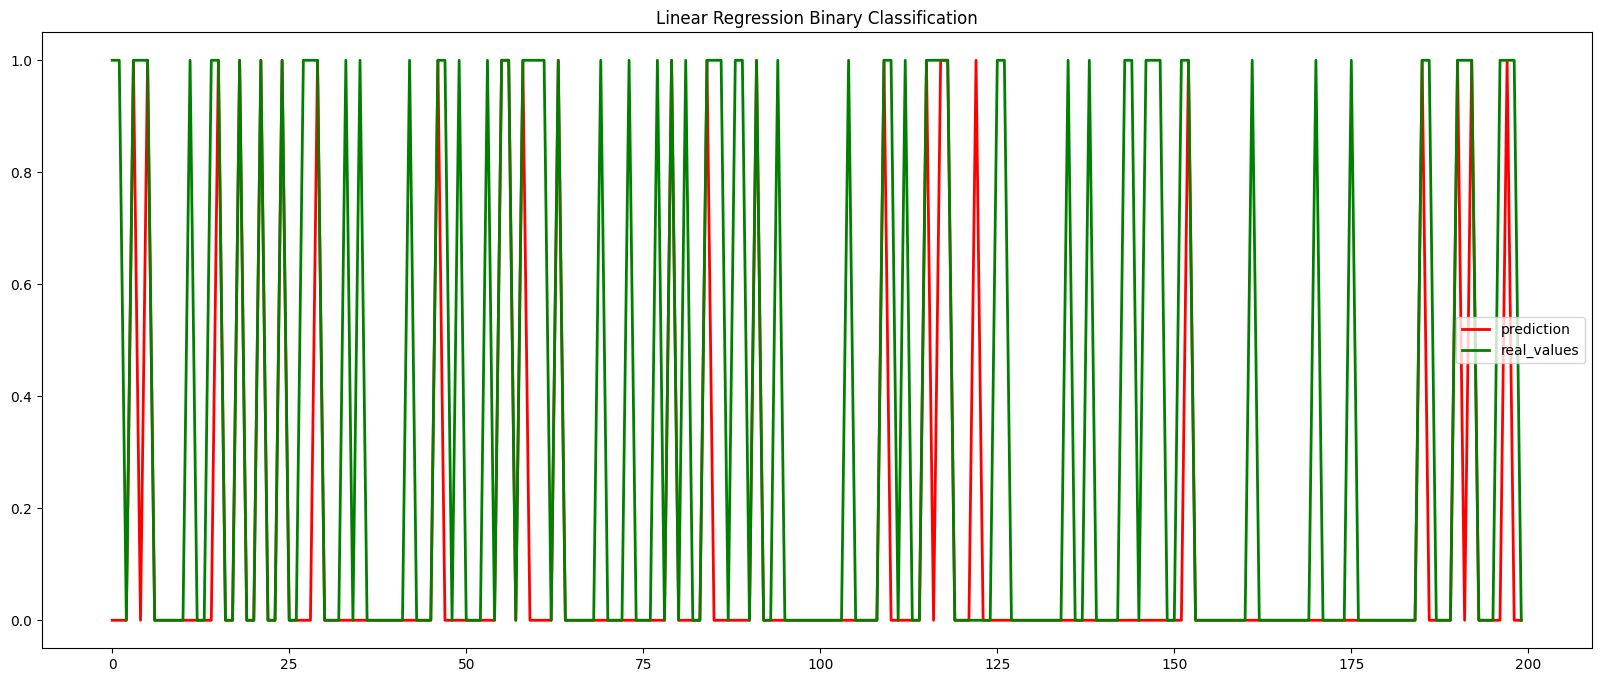

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Linear Regression Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/lr_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/linear_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
    with open(pkl_filename, 'wb') as file:
        pickle.dump(lr_bin, file)
        print("Saved the model")
else:
    print("Previous Model exists on the disk! Please Remove")

Previous Model exists on the disk! Please Remove


KNN

In [ ]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.07419658387749864
Mean Squared Error -  0.07419658387749864
Root Mean Squared Error -  0.2723904988752336
R2 Score -  65.81855544598665
Accuracy -  92.58034161225014


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      0.97      0.97     12326
      normal       0.91      0.89      0.90      3909

    accuracy                           0.95     16235
   macro avg       0.94      0.93      0.93     16235
weighted avg       0.95      0.95      0.95     16235



In [ ]:
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


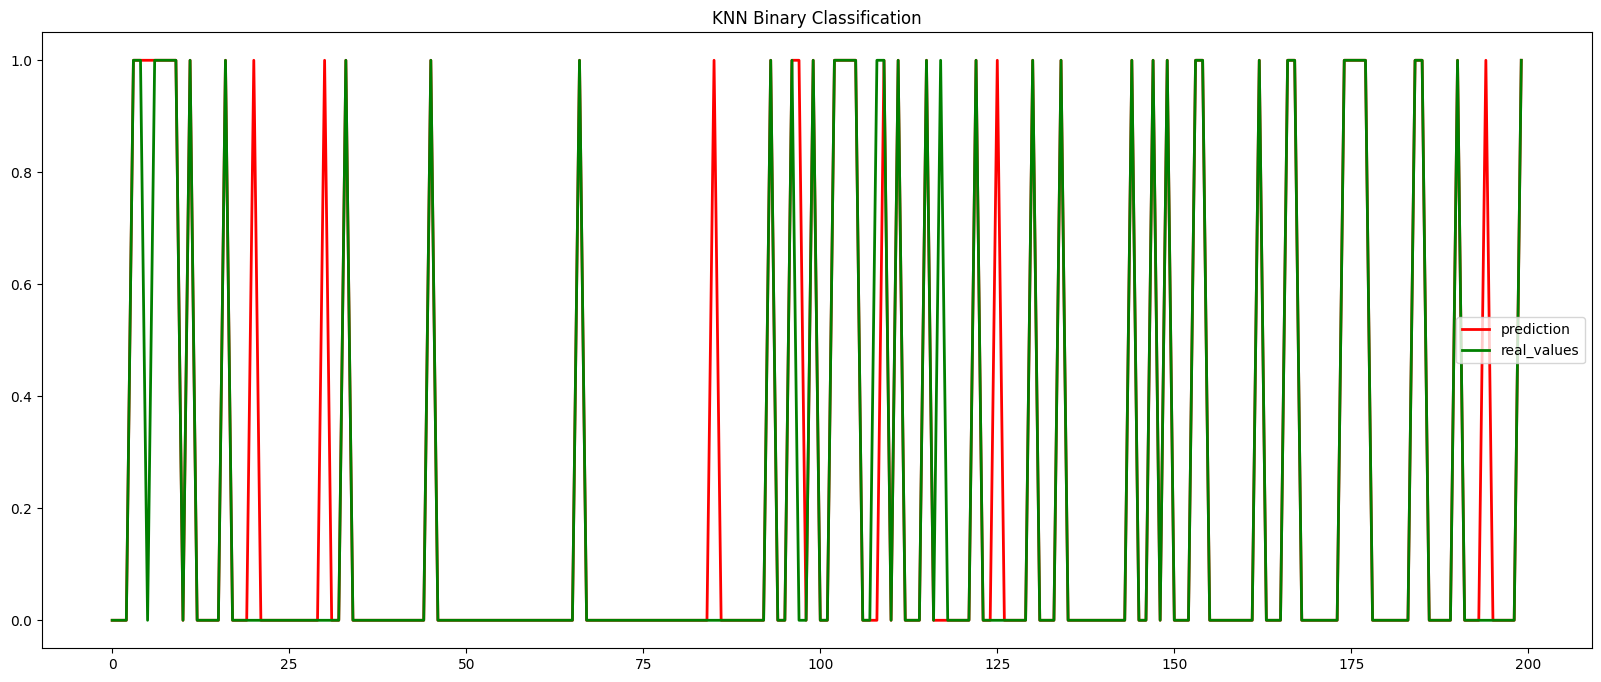

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("KNN Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/knn_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


MLP

In [ ]:
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [ ]:
mlp_bin.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [ ]:
y_pred = mlp_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.07871881736987989
Mean Squared Error -  0.07871881736987989
Root Mean Squared Error -  0.28056873911731484
R2 Score -  57.08253983711127
Accuracy -  92.12811826301201


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.94      0.96      0.95     12326
      normal       0.86      0.80      0.83      3909

    accuracy                           0.92     16235
   macro avg       0.90      0.88      0.89     16235
weighted avg       0.92      0.92      0.92     16235



In [ ]:
mlp_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,0
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


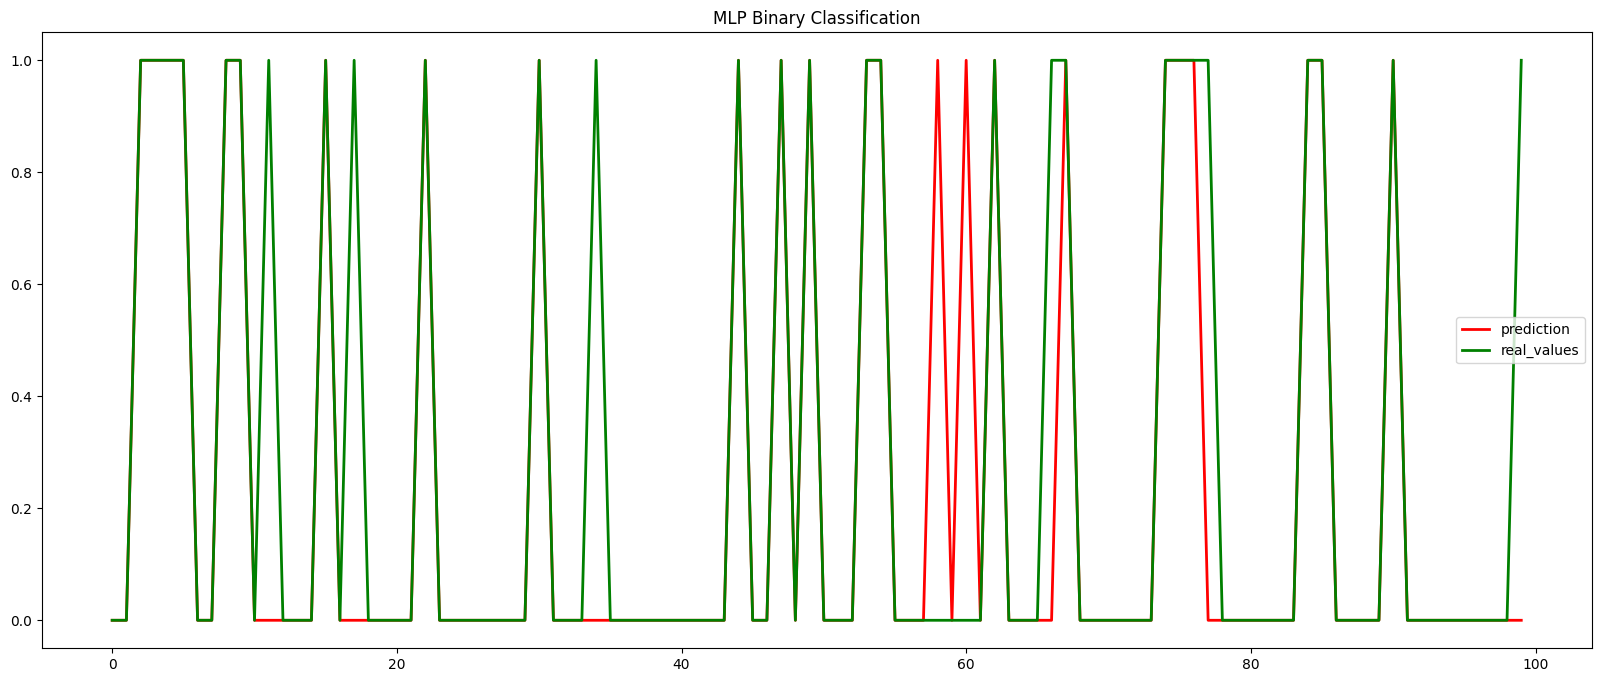

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("MLP Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/mlp_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/mlp_binary.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


Random Forest

In [ ]:
rf_bin = RandomForestClassifier(random_state=123)
rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [ ]:
y_pred = rf_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.025007699414844473
Mean Squared Error -  0.025007699414844473
Root Mean Squared Error -  0.15813822882163717
R2 Score -  86.47341160351428
Accuracy -  97.49923005851555


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      0.99      0.98     12326
      normal       0.98      0.91      0.95      3909

    accuracy                           0.97     16235
   macro avg       0.98      0.95      0.96     16235
weighted avg       0.98      0.97      0.97     16235



In [ ]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


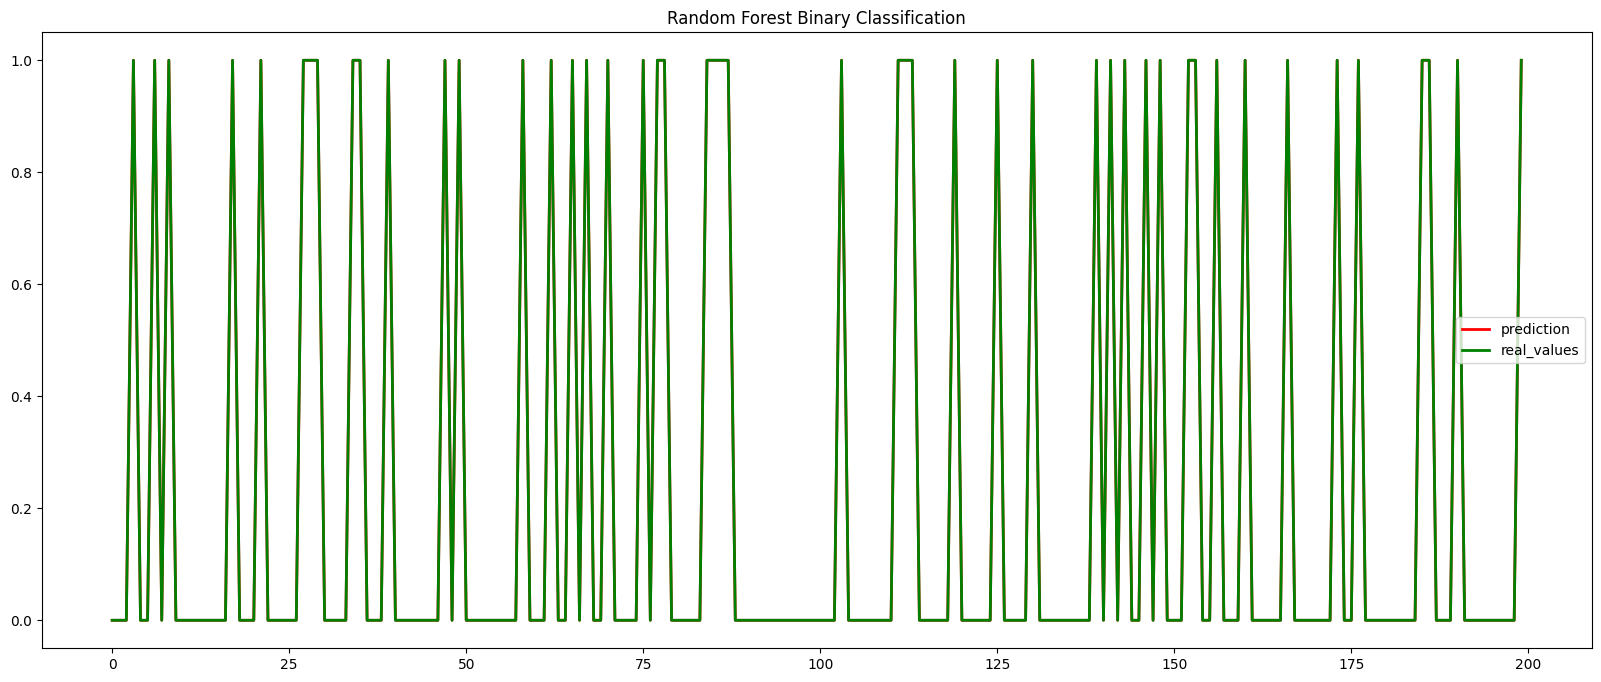

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/rf_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


Decision Tree

In [ ]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03190637511549122
Mean Squared Error -  0.03190637511549122
Root Mean Squared Error -  0.178623557000445
R2 Score -  82.5567893825982
Accuracy -  96.80936248845087


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98     12326
      normal       0.93      0.94      0.93      3909

    accuracy                           0.97     16235
   macro avg       0.95      0.96      0.96     16235
weighted avg       0.97      0.97      0.97     16235



In [ ]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


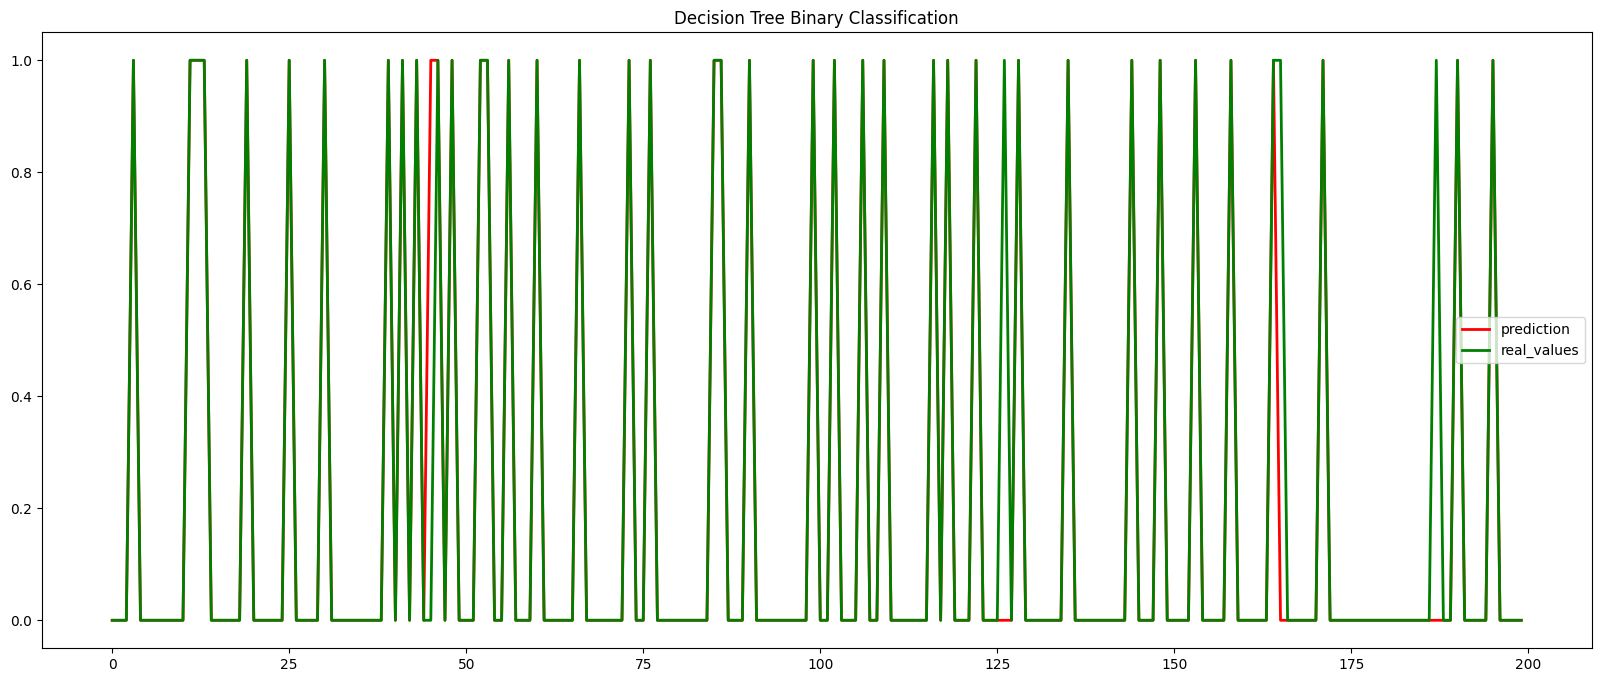

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/dt_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


Logistic Regression

In [ ]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [ ]:
logr_bin.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=123)

In [ ]:
y_pred = logr_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.12423775793039729
Mean Squared Error -  0.12423775793039729
Root Mean Squared Error -  0.35247376913806977
R2 Score -  37.888118910968494
Accuracy -  87.57622420696028


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.87      0.99      0.92     12326
      normal       0.92      0.53      0.67      3909

    accuracy                           0.88     16235
   macro avg       0.90      0.76      0.80     16235
weighted avg       0.88      0.88      0.86     16235



In [ ]:
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,0
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


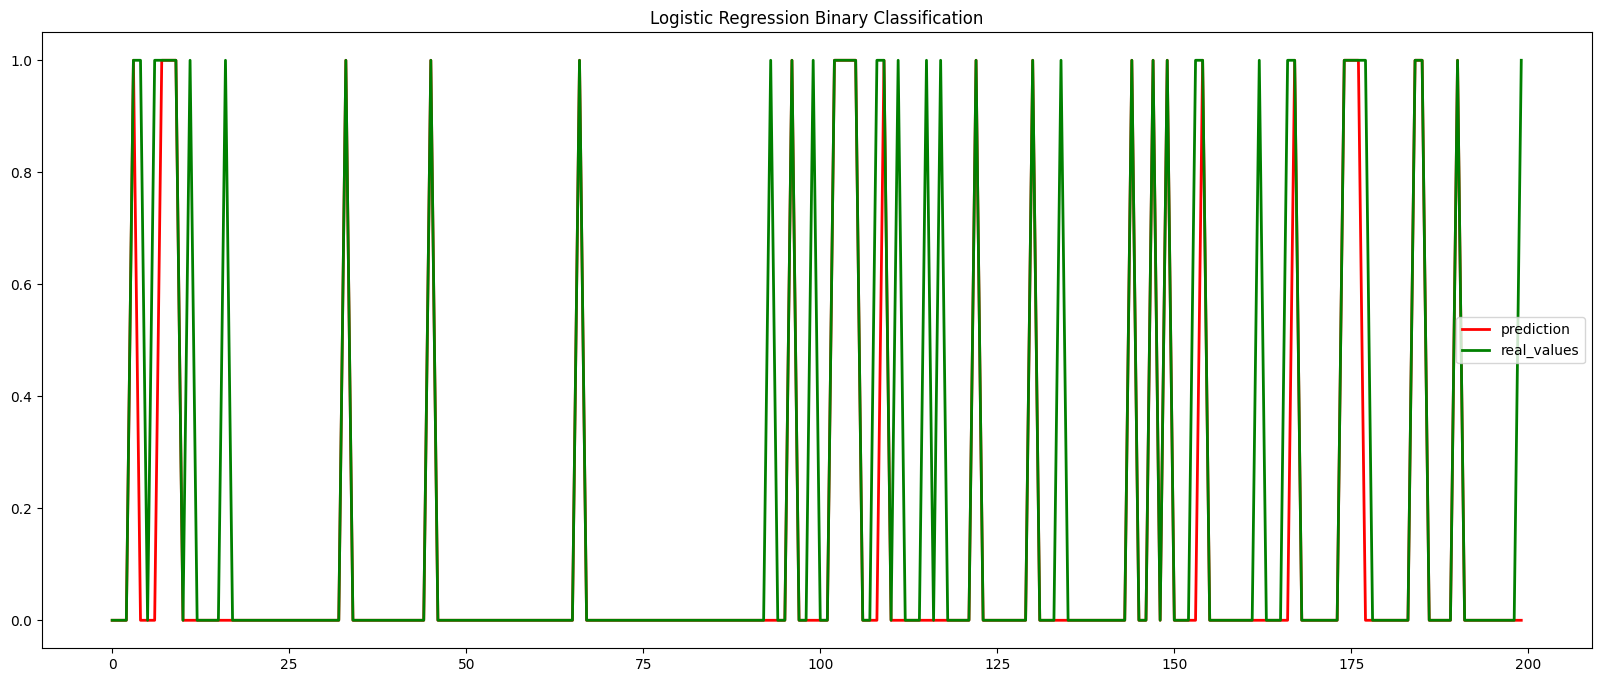

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/logr_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/logistic_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


SVM

In [ ]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred = lsvm_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.12479211579919926
Mean Squared Error -  0.12479211579919926
Root Mean Squared Error -  0.35325927560249465
R2 Score -  37.49461368973949
Accuracy -  87.52078842008008


In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,0
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


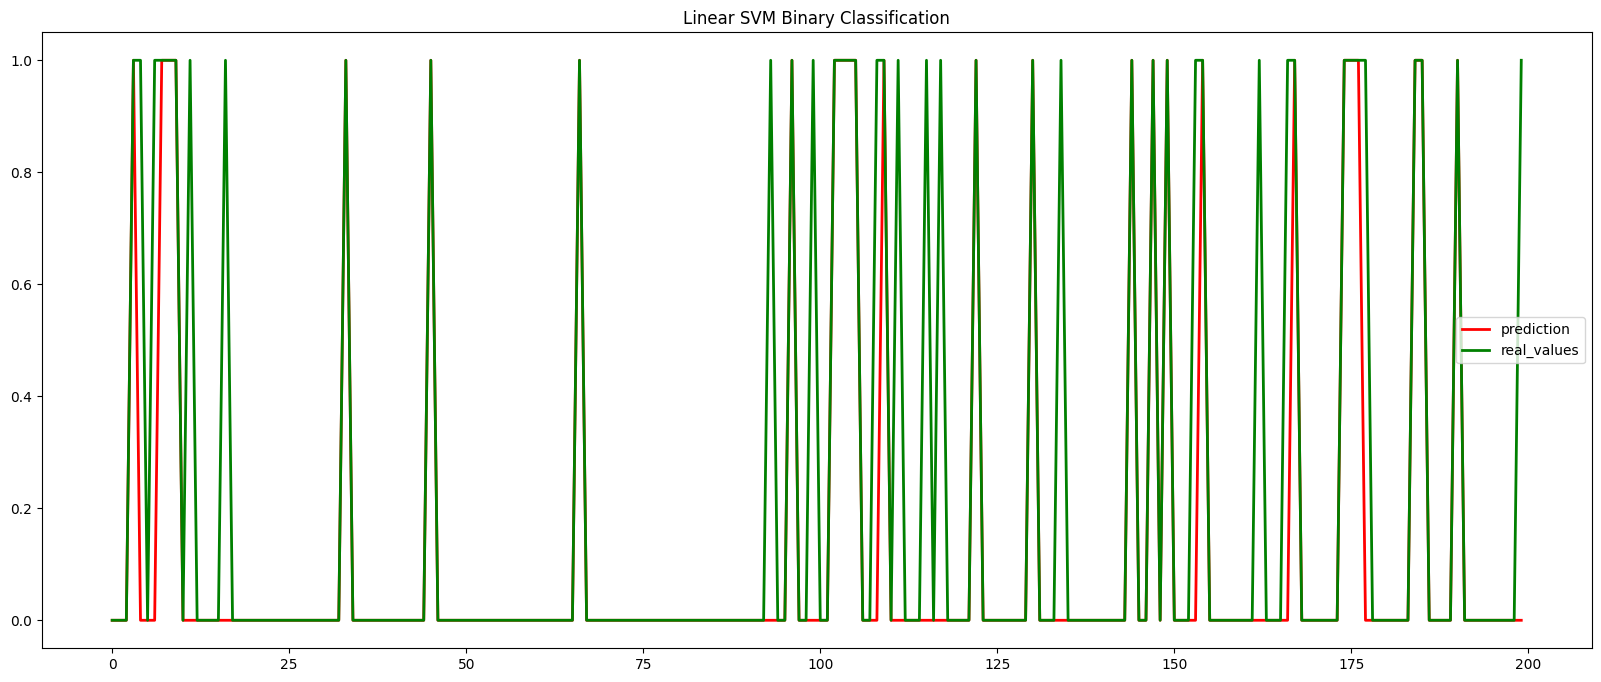

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/lsvm_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


Multiclass Classification

In [ ]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

Linear Regression

In [ ]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_multi.predict(X_test)

In [ ]:
for i in range(len(y_pred)):
    y_pred[i] = int(round(y_pred[i]))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  3.765234888304862
Mean Squared Error -  15.603851839684625
Root Mean Squared Error -  3.9501711152410377
R2 Score -  3.9127682233939476
Accuracy -  0.8130749014454665


In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      1.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.00      0.00      0.00      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.00      0.00      0.00     11839
        Normal       0.00      0.00      0.00      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.01     24352
     macro avg       0.11      0.22      0.11     24352
  weighted avg       0.01      0.01      0.01     24352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_multi_df

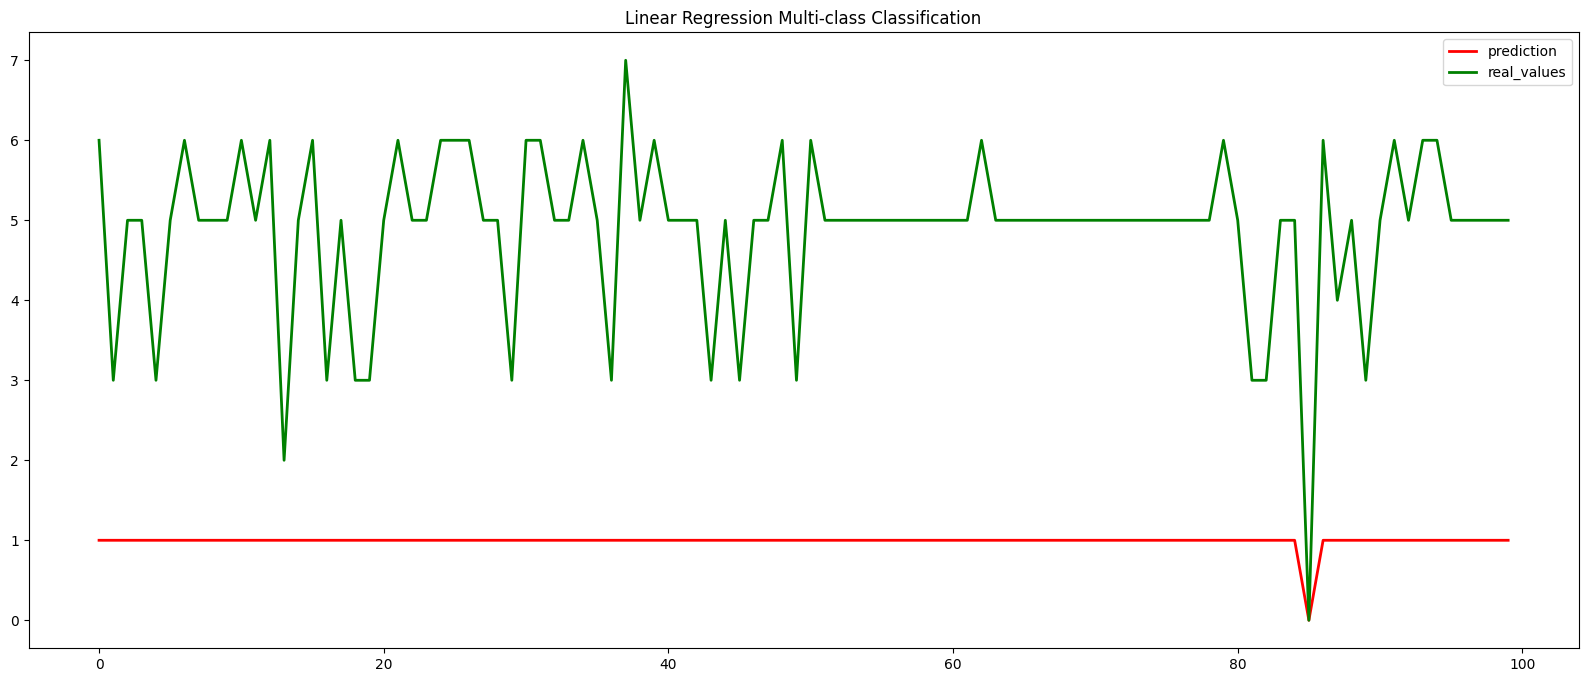

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Linear Regression Multi-class Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/lr_real_pred_multi.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/linear_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
    with open(pkl_filename, 'wb') as file:
        pickle.dump(lr_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


KNN

In [ ]:
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06484067017082785
Mean Squared Error -  0.19353646517739817
Root Mean Squared Error -  0.439927795413518
R2 Score -  86.96715140772851
Accuracy -  97.38009198423127


In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.48      0.52      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.56      0.54      0.55       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.97     24352
     macro avg       0.67      0.67      0.67     24352
  weighted avg       0.97      0.97      0.97     24352



In [ ]:
knn_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


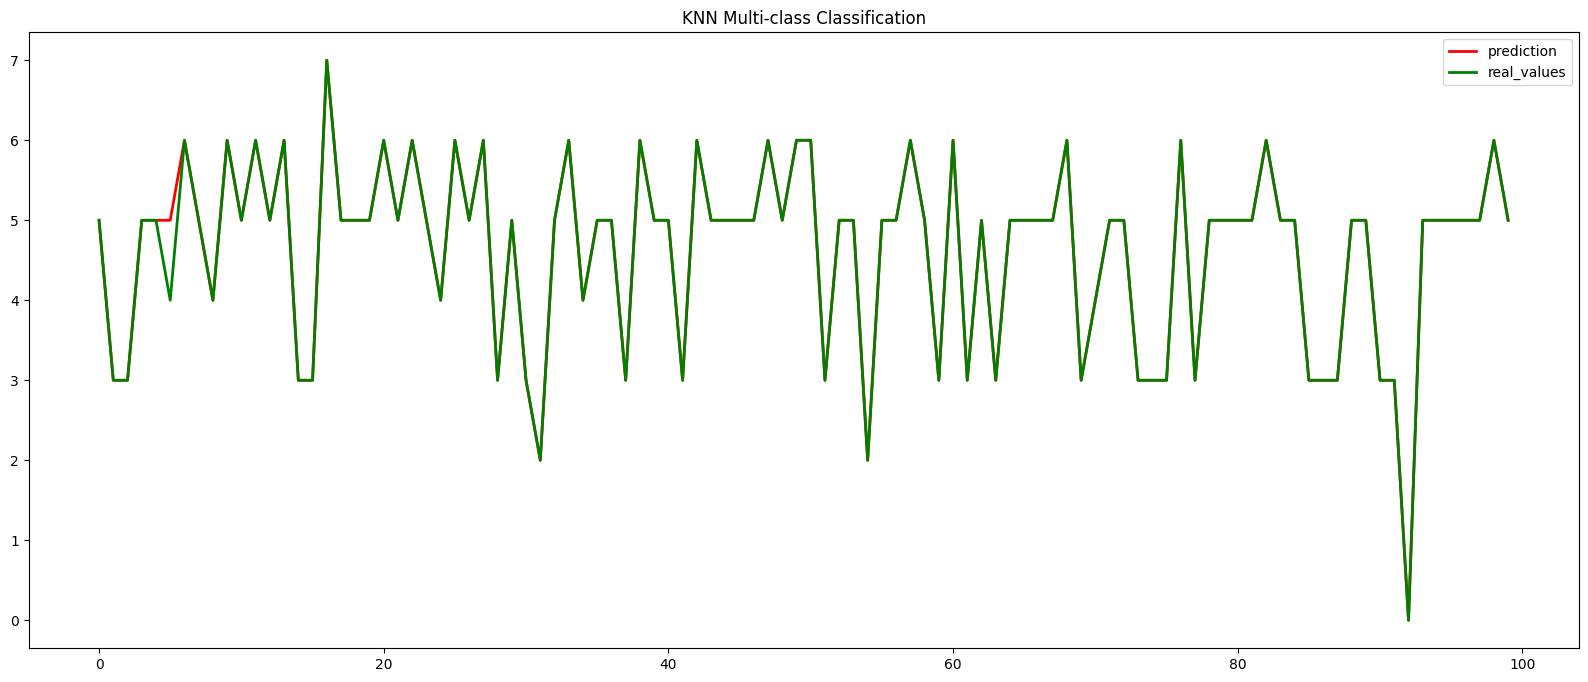

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:500], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[400:500].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("KNN Multi-class Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/knn_real_pred_multi.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
    with open(pkl_filename, 'wb') as file:
        pickle.dump(knn_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


Decision Tree

In [ ]:
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
y_pred = dt_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06820795006570302
Mean Squared Error -  0.2044595926412615
Root Mean Squared Error -  0.45217208299635386
R2 Score -  86.23520368703964
Accuracy -  97.178876478318


In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.06      0.06      0.06        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.38      0.43       508
       Generic       0.98      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.55      0.57      0.56       502
         Worms       0.05      0.07      0.06        29

      accuracy                           0.97     24352
     macro avg       0.68      0.67      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



In [ ]:
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


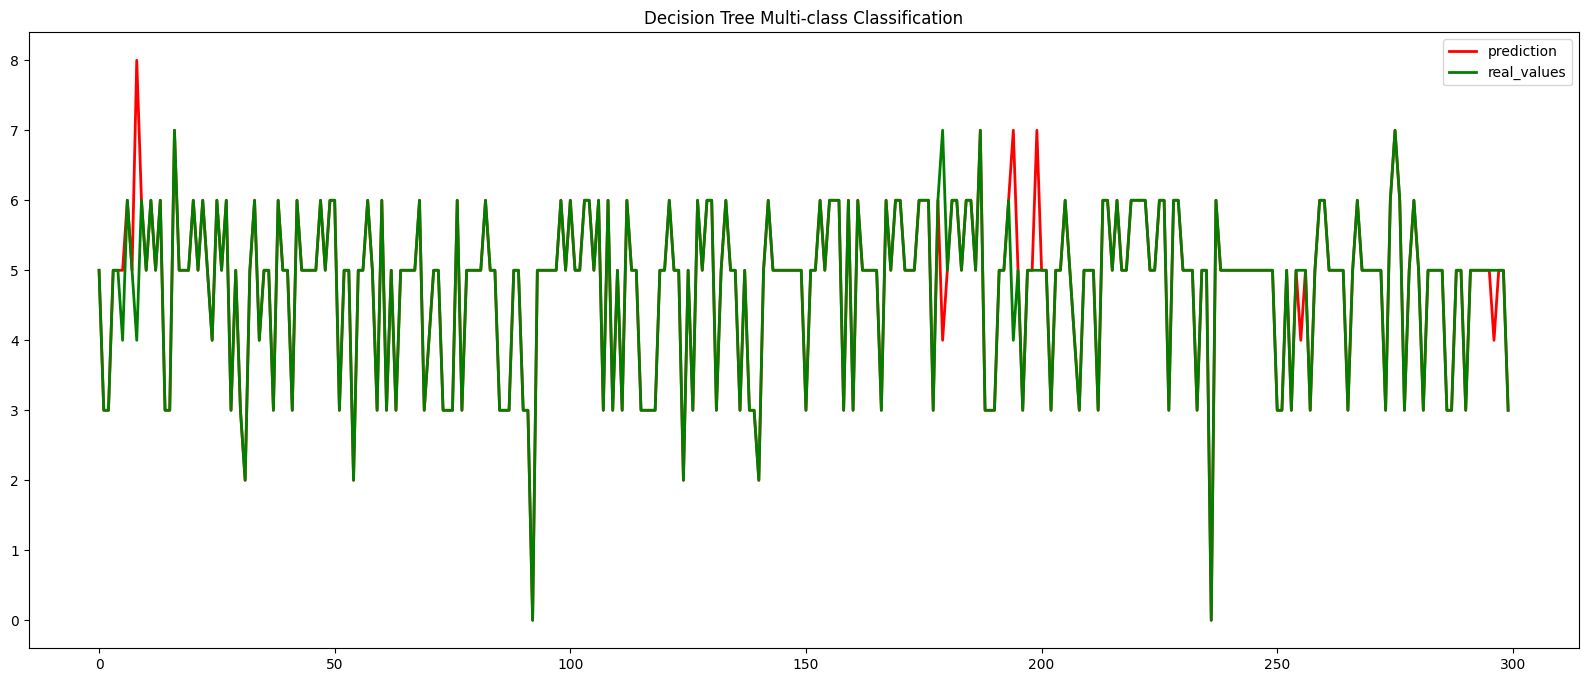

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:700], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/dt_real_pred_multi.png')
plt.show()

In [ ]:
pkl_filename = "/content/drive/MyDrive/Major project/models/decision_tree_multi.pkl"
if (not path.isfile(pkl_filename)):
    with open(pkl_filename, 'wb') as file:
        pickle.dump(dt_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


MLP

Random Forest

Logistic Regression

SVM

dfd

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 11)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 11), dtype=float64)
      • training=True
      • mask=None


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
#from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D

In [ ]:
X_train=X_train.values.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))

IndexError: tuple index out of range

In [ ]:
model = Sequential()

model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (X_train.shape[1], 1)))
# model.add(Convolution1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(4)))
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))
# model.add(tf.keras.layers.LayerNormalization())

# model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
# model.add(AveragePooling1D(pool_size=(2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


In [ ]:
model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "conv1d_2" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 11)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 11), dtype=float64)
      • training=True
      • mask=None


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
model = Sequential()

# input layer
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
548/548 [==============================] - 6s 7ms/step - loss: 0.3948 - val_loss: 0.3188
Epoch 2/25
548/548 [==============================] - 2s 4ms/step - loss: 0.3114 - val_loss: 0.2879
Epoch 3/25
548/548 [==============================] - 3s 5ms/step - loss: 0.2897 - val_loss: 0.2784
Epoch 4/25
548/548 [==============================] - 3s 5ms/step - loss: 0.2788 - val_loss: 0.2799
Epoch 5/25
548/548 [==============================] - 2s 4ms/step - loss: 0.2709 - val_loss: 0.2567
Epoch 6/25
548/548 [==============================] - 2s 4ms/step - loss: 0.2640 - val_loss: 0.2547
Epoch 7/25
548/548 [==============================] - 2s 4ms/step - loss: 0.2576 - val_loss: 0.2439
Epoch 8/25
548/548 [==============================] - 2s 3ms/step - loss: 0.2533 - val_loss: 0.2405
Epoch 9/25
548/548 [==============================] - 2s 4ms/step - loss: 0.2489 - val_loss: 0.2367
Epoch 10/25
548/548 [==============================] - 3s 5ms/step - loss: 0.2468 - val_loss: 0.2471

In [ ]:
y_pred = model.predict(X_test)
y_pred

1096/1096 [==============================] - 4s 4ms/step


array([[0.31025672],
       [0.22390601],
       [0.18173519],
       ...,
       [0.30474404],
       [0.22404483],
       [0.22265536]], dtype=float32)

In [ ]:
threshold=0.3
bin_y_pred=(y_pred>threshold).astype(int)
bin_y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,bin_y_pred)*100)

Mean Absolute Error -  0.1479938264869892
Mean Squared Error -  0.07054522277908869
Root Mean Squared Error -  0.2656035067145927
R2 Score -  67.34002577436256
Accuracy -  89.34101343066526


In [ ]:
print(classification_report(y_test,bin_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     24001
           1       0.84      0.82      0.83     11068

    accuracy                           0.89     35069
   macro avg       0.88      0.87      0.88     35069
weighted avg       0.89      0.89      0.89     35069



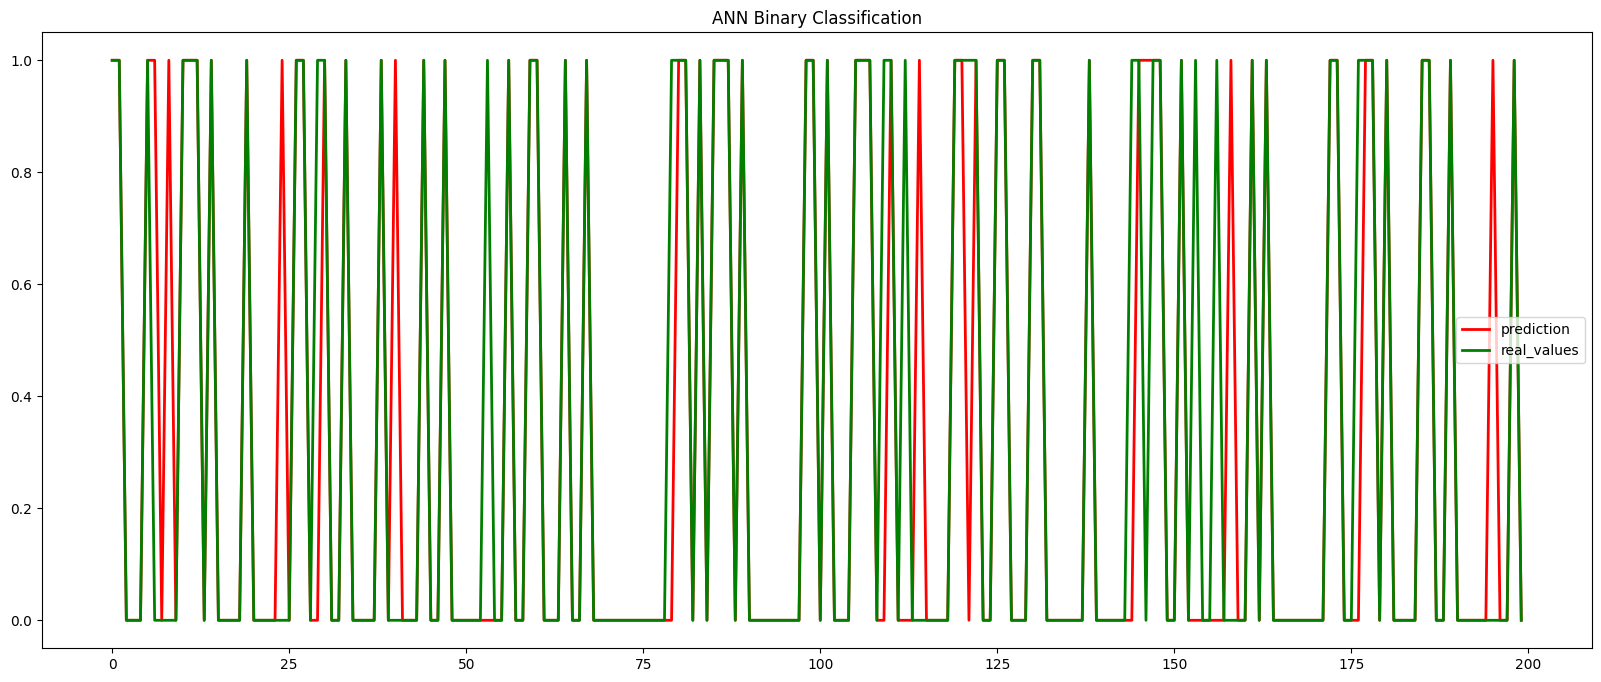

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bin_y_pred[200:400], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("ANN Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/ann_real_pred_bin.png')
plt.show()

Multiclass Classification

In [76]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

ANN Classification

In [78]:
model = Sequential()

# input layer
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [79]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
480/480 [==============================] - 5s 8ms/step - loss: -0.2892 - val_loss: -1.2660
Epoch 2/25
480/480 [==============================] - 4s 8ms/step - loss: -2.2110 - val_loss: -3.1517
Epoch 3/25
480/480 [==============================] - 3s 6ms/step - loss: -4.0664 - val_loss: -4.9806
Epoch 4/25
480/480 [==============================] - 2s 4ms/step - loss: -5.8736 - val_loss: -6.7695
Epoch 5/25
480/480 [==============================] - 2s 4ms/step - loss: -7.6497 - val_loss: -8.5352
Epoch 6/25
480/480 [==============================] - 2s 4ms/step - loss: -9.4086 - val_loss: -10.2891
Epoch 7/25
480/480 [==============================] - 2s 3ms/step - loss: -11.1593 - val_loss: -12.0380
Epoch 8/25
480/480 [==============================] - 2s 5ms/step - loss: -12.9076 - val_loss: -13.7864
Epoch 9/25
480/480 [==============================] - 4s 8ms/step - loss: -14.6558 - val_loss: -15.5355
Epoch 10/25
480/480 [==============================] - 3s 6ms/step - loss: 

In [80]:
y_pred = model.predict(X_test)
y_pred

1644/1644 [==============================] - 2s 1ms/step


array([[0.9999932],
       [0.9999932],
       [0.9999932],
       ...,
       [0.9999932],
       [0.9999932],
       [0.9999932]], dtype=float32)

In [81]:
threshold=0.3
bin_y_pred=(y_pred>threshold).astype(int)
bin_y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [83]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,bin_y_pred)*100*100)

Mean Absolute Error -  3.6939974722951896
Mean Squared Error -  15.93984418985259
Root Mean Squared Error -  3.9924734425982837
R2 Score -  0.0
Accuracy -  96.57243883428701


In [84]:
print(classification_report(y_test,bin_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       618
           1       0.01      1.00      0.02       508
           2       0.00      0.00      0.00      3710
           3       0.00      0.00      0.00      9998
           4       0.00      0.00      0.00      5439
           5       0.00      0.00      0.00     11917
           6       0.00      0.00      0.00     16873
           7       0.00      0.00      0.00      3169
           8       0.00      0.00      0.00       341
           9       0.00      0.00      0.00        30

    accuracy                           0.01     52603
   macro avg       0.00      0.10      0.00     52603
weighted avg       0.00      0.01      0.00     52603



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


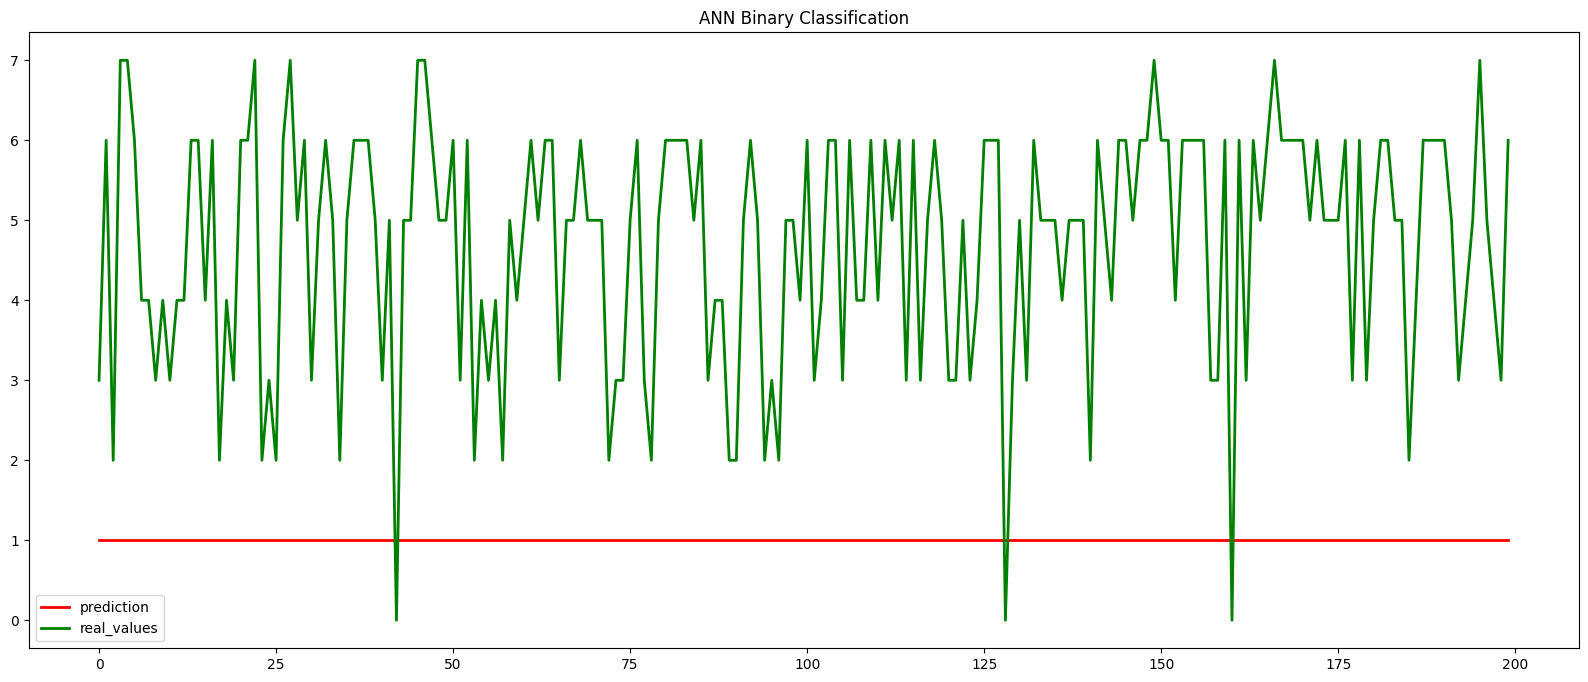

In [85]:
plt.figure(figsize=(20,8))
plt.plot(bin_y_pred[200:400], label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.title("ANN Binary Classification")
plt.savefig('/content/drive/MyDrive/Major project/plots/ann_real_pred_multi.png')
plt.show()